https://colab.research.google.com/drive/1xBwnwkTwDXvmiJNFh9e2z5QY_9mg-vVi?usp=sharing

# Классификация с помощью Keras

Качество лучшей модели: ~0.85

## Импорты библиотек

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model

## Загрузка и подготовка данных

In [29]:
adult_data = pd.read_csv("drive/MyDrive/adult_preprocessed.csv")
adult_data

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,257302,12,1,0,0,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30158,40,154374,9,0,0,0,40,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30159,58,151910,9,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30160,22,201490,9,0,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Выделим исследуемый признак

In [30]:
y = adult_data['salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    1
30159    0
30160    0
30161    1
Name: salary, Length: 30162, dtype: int64

In [31]:
X = adult_data.drop(['salary'], axis=1)
X

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,257302,12,1,0,0,38,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30158,40,154374,9,0,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30159,58,151910,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30160,22,201490,9,0,0,0,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Разбиение данных на тренировочную и тестовую выборки. Масштабирование признаков

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Эксперимент №1
* Без скрытых слоев
* Функция активации выходного слоя - sigmoid
* 50 эпох обучения

In [34]:
model_first = Sequential()
model_first.add(Input(87, name='InputLayer'))
model_first.add(Dense(1, activation='sigmoid', name='OutputLayer'))

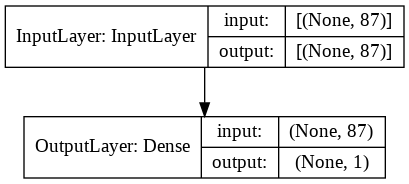

In [35]:
plot_model(model_first, show_shapes=True, show_layer_names=True)

In [36]:
model_first.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model_first.fit(X_train, y_train, epochs=50)

Epoch 1/50
755/755 [==============================] - 2s 1ms/step - loss: 0.6036 - accuracy: 0.7039
Epoch 2/50
755/755 [==============================] - 1s 1ms/step - loss: 0.4104 - accuracy: 0.8298
Epoch 3/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8416
Epoch 4/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8522
Epoch 5/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8507
Epoch 6/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8510
Epoch 7/50
755/755 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8492
Epoch 8/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3301 - accuracy: 0.8480
Epoch 9/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3274 - accuracy: 0.8486
Epoch 10/50
755/755 [==============================] - 1s 1ms/step - loss: 0.3248 - accuracy: 0.8501

In [38]:
_ , accuracy = model_first.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

189/189 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8480
Accuracy: 84.8003


## Эксперимент №2
* 1 скрытый слой (функция активации - sigmoid, 5 нейронов)
* Функция активации выходного слоя - relu
* 100 эпох обучения

In [40]:
model_second = Sequential()
model_second.add(Input(87, name='InputLayer'))
model_second.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_second.add(Dense(1, activation='relu', name='OutputLayer'))

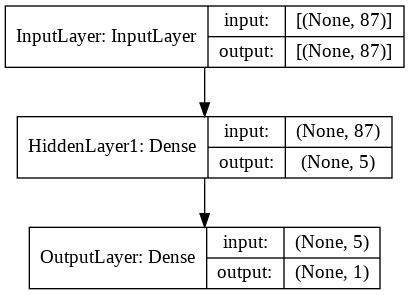

In [42]:
plot_model(model_second, show_shapes=True, show_layer_names=True)

In [43]:
model_second.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model_second.fit(X_train, y_train, epochs=100)

Epoch 1/100
755/755 [==============================] - 2s 2ms/step - loss: 3.5304 - accuracy: 0.3230
Epoch 2/100
755/755 [==============================] - 1s 2ms/step - loss: 0.9626 - accuracy: 0.6643
Epoch 3/100
755/755 [==============================] - 1s 2ms/step - loss: 0.7695 - accuracy: 0.7759
Epoch 4/100
755/755 [==============================] - 1s 2ms/step - loss: 0.5932 - accuracy: 0.7985
Epoch 5/100
755/755 [==============================] - 1s 2ms/step - loss: 0.5915 - accuracy: 0.8111
Epoch 6/100
755/755 [==============================] - 1s 2ms/step - loss: 0.5784 - accuracy: 0.8212
Epoch 7/100
755/755 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.8230
Epoch 8/100
755/755 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.8315
Epoch 9/100
755/755 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8368
Epoch 10/100
755/755 [==============================] - 1s 2ms/step - loss: 0.4118 - accura

In [45]:
_ , accuracy = model_second.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

189/189 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8497
Accuracy: 84.9660


## Эксперимент №3
* скрытый слоя (функция активации - sigmoid, 5 нейронов)
* скрытый слоя (функция активации - sigmoid, 3 нейронов)
* Функция активации выходного слоя - relu
* 150 эпох обучения

In [46]:
model_third = Sequential()
model_third.add(Input(87, name='InputLayer'))
model_third.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_third.add(Dense(3, name='HiddenLayer2', activation='sigmoid'),)
model_third.add(Dense(1, activation='relu', name='OutputLayer'))

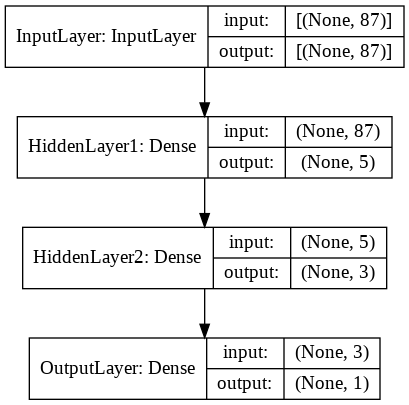

In [48]:
plot_model(model_third, show_shapes=True, show_layer_names=True)

In [49]:
model_third.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model_third.fit(X_train, y_train, epochs=150)

Epoch 1/150
755/755 [==============================] - 2s 2ms/step - loss: 1.7882 - accuracy: 0.7495
Epoch 2/150
755/755 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.7544
Epoch 3/150
755/755 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8199
Epoch 4/150
755/755 [==============================] - 1s 2ms/step - loss: 0.3770 - accuracy: 0.8360
Epoch 5/150
755/755 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8328
Epoch 6/150
755/755 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8417
Epoch 7/150
755/755 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.8430
Epoch 8/150
755/755 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8461
Epoch 9/150
755/755 [==============================] - 1s 1ms/step - loss: 0.3550 - accuracy: 0.8464
Epoch 10/150
755/755 [==============================] - 1s 2ms/step - loss: 0.3526 - accura

In [51]:
_ , accuracy = model_third.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

189/189 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8510
Accuracy: 85.0986


## Эксперимент №4
* скрытый слоя (функция активации - sigmoid, 5 нейронов)
* скрытый слоя (функция активации - relu, 4 нейронов)
* скрытый слоя (функция активации - sigmoid, 3 нейрона)
* Функция активации выходного слоя - relu
* 300 эпох обучения

In [52]:
model_fourth = Sequential()
model_fourth.add(Input(87, name='InputLayer'))
model_fourth.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_fourth.add(Dense(4, name='HiddenLayer2', activation='relu'),)
model_fourth.add(Dense(3, name='HiddenLayer3', activation='sigmoid'),)
model_fourth.add(Dense(1, activation='relu', name='OutputLayer'))

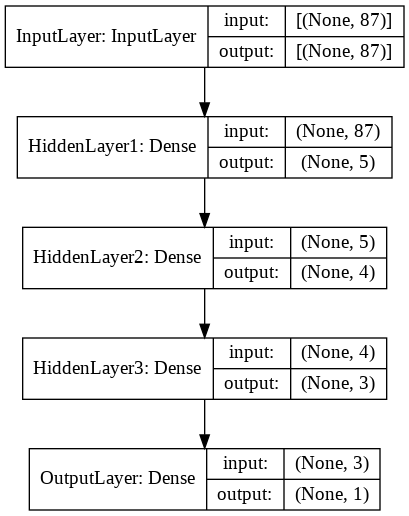

In [53]:
plot_model(model_fourth, show_shapes=True, show_layer_names=True)

In [54]:
model_fourth.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model_fourth.fit(X_train, y_train, epochs=300)

Epoch 1/300
755/755 [==============================] - 2s 2ms/step - loss: 3.8155 - accuracy: 0.7526
Epoch 2/300
755/755 [==============================] - 1s 2ms/step - loss: 3.8276 - accuracy: 0.7519
Epoch 3/300
755/755 [==============================] - 1s 2ms/step - loss: 3.8292 - accuracy: 0.7518
Epoch 4/300
755/755 [==============================] - 1s 1ms/step - loss: 3.7491 - accuracy: 0.7569
Epoch 5/300
755/755 [==============================] - 1s 1ms/step - loss: 3.8386 - accuracy: 0.7511
Epoch 6/300
755/755 [==============================] - 1s 1ms/step - loss: 3.8016 - accuracy: 0.7535
Epoch 7/300
755/755 [==============================] - 1s 1ms/step - loss: 3.8155 - accuracy: 0.7526
Epoch 8/300
755/755 [==============================] - 1s 1ms/step - loss: 3.8122 - accuracy: 0.7529
Epoch 9/300
755/755 [==============================] - 1s 2ms/step - loss: 3.8499 - accuracy: 0.7504
Epoch 10/300
755/755 [==============================] - 1s 2ms/step - loss: 3.8664 - accura

In [56]:
_ , accuracy = model_fourth.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

189/189 [==============================] - 0s 1ms/step - loss: 3.8403 - accuracy: 0.7510
Accuracy: 75.1036


## Выводы
* Лучшее качество обеспечивает модель 3 (эксперимент №3)
* Время на обучение нейронной сети прямо пропорционально количеству эпох обучения
* Увеличение количества эпох улучшает качество моделей, однако потенциально может привести к переобучению модели (как это случилось в модели 4)
* Для достижения наилучших результатов работы сети требуется перебирать различные варианты ее архитектуры, комбинировать слои с различным количеством нейронов и различными
функциями активации
* Качество моделей на основе нейронных сетей превосходит качество всех классических моделей

## Сохранение и загрузка модели

In [57]:
model_third.save('drive/MyDrive/keras_models/model_third')

INFO:tensorflow:Assets written to: drive/MyDrive/keras_models/model_third/assets
